In [ ]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

from statistics import mean
from statistics import stdev
import math

from sklearn.tree import DecisionTreeClassifier
sns.set_style("darkgrid")
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
dataset=pd.read_csv(url)
#df.set_index('PassengerId', inplace=True)
#df = df.reset_index(drop=True)
display(dataset)
#df.plot.scatter(x = 'TV', y = 'Sales', s = 5);
display(dataset.info())
display(dataset.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#check for missing values
print("Percentage of missing values:")
print(((dataset.isna().sum())/dataset.shape[0])*100)

print(round(dataset.groupby(['Sex', 'Pclass'])['Age'].agg(['mean']), 0))#age

dataset["Age"] = dataset["Age"].fillna(-1)

#loop to handle missing values
for data_index in range(dataset.shape[0]):
  if dataset["Age"][data_index] == -1:
    if ((dataset["Sex"][data_index] == "female") and (dataset["Pclass"][data_index] == 1)):
      dataset["Age"][data_index] = 35
    elif((dataset["Sex"][data_index] == "female") and (dataset["Pclass"][data_index] == 2)):
      dataset["Age"][data_index] = 29
    elif((dataset["Sex"][data_index] == "female") and (dataset["Pclass"][data_index] == 3)):
      dataset["Age"][data_index] = 22
    elif((dataset["Sex"][data_index] == "male") and (dataset["Pclass"][data_index] == 1)):
      dataset["Age"][data_index] = 41
    elif((dataset["Sex"][data_index] == "male") and (dataset["Pclass"][data_index] == 2)):
      dataset["Age"][data_index] = 31
    elif((dataset["Sex"][data_index] == "male") and (dataset["Pclass"][data_index] == 3)):
      dataset["Age"][data_index] = 27


print("Percentage of missing values in feature 'Age': ", str((dataset["Age"].isna().sum())/dataset.shape[0])+"%")
dataset["Age"][0:10]
dataset = dataset.drop(columns = ["Cabin"])
display(dataset.columns)
dataset.dropna(inplace = True)
print("Percentage of missing values in feature 'Embarked': ", str((dataset["Embarked"].isna().sum())/dataset.shape[0])+"%")
dataset["Embarked"][0:10]
dataset.isna().sum()

#all features
print("Features in titanic dataset:\n", dataset.columns)


Percentage of missing values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
               mean
Sex    Pclass      
female 1       35.0
       2       29.0
       3       22.0
male   1       41.0
       2       31.0
       3       27.0
Percentage of missing values in feature 'Age':  0.0%


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Percentage of missing values in feature 'Embarked':  0.0%
Features in titanic dataset:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [ ]:
dataset.drop(columns = ["PassengerId", "Name", "Ticket"], inplace = True)
#all features
print("Features in titanic dataset:\n", dataset.columns)

Features in titanic dataset:
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


<Axes: xlabel='Survived', ylabel='Fare'>

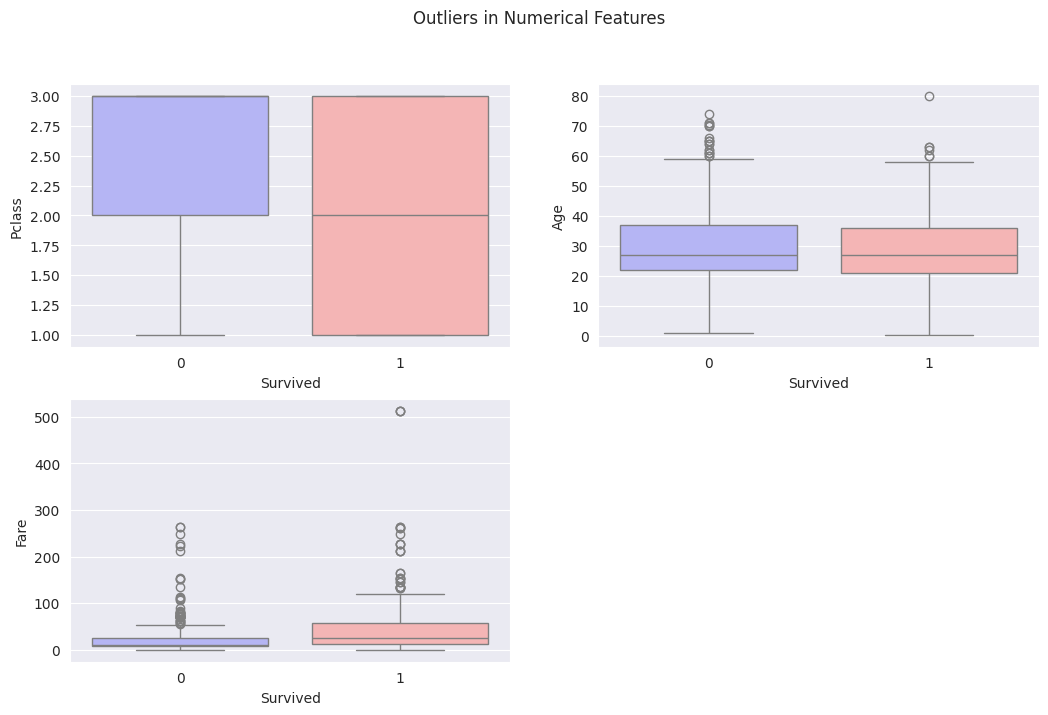

In [ ]:
#check for continuos features
dataset.info()
figure, axes = plt.subplots(2, 2, figsize = (12.5, 7.5))
figure.suptitle("Outliers in Numerical Features")
figure.delaxes(axes[1][1])

sns.boxplot(ax = axes[0, 0], data = dataset, x = "Survived", y = "Pclass", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = dataset, x = "Survived", y = "Age", palette = "bwr")
sns.boxplot(ax = axes[1, 0], data = dataset, x = "Survived", y = "Fare", palette = "bwr")

In [ ]:
#check categorical columns
dataset.info()
#Pclass
print("Discrete values:\n", dataset["Pclass"].unique())

print("Column 'Sex' before encoding:")
print(dataset["Sex"][0:5])

dataset["Sex"].replace("female", 0, inplace = True)
dataset["Sex"].replace("male", 1, inplace = True)

print("Column 'Sex' after encoding:")
print(dataset["Sex"][0:5])


print("Unique values:\n", dataset["Embarked"].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB
Discrete values:
 [3 1 2]
Column 'Sex' before encoding:
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
Column 'Sex' after encoding:
0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64
Unique values:
 ['S' 'C' 'Q']


In [ ]:
#function to encode 'Embarked'
def encode_embarked(column):

  for data in column:
    if data == 'S':
      column[column.index(data)] = 0
    elif data == 'C':
      column[column.index(data)] = 1
    else:
      column[column.index(data)] = 2

  return column


In [ ]:
#implement function
print("Column 'Embarked' before encoding:")
print(dataset["Embarked"][0:5])

dataset["Embarked"] = encode_embarked(list(dataset["Embarked"]))

print("Column 'Embarked' after encoding:")
print(dataset["Embarked"][0:5])

Column 'Embarked' before encoding:
0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
Column 'Embarked' after encoding:
0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64



Visualization


In [ ]:
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='Embarked'>

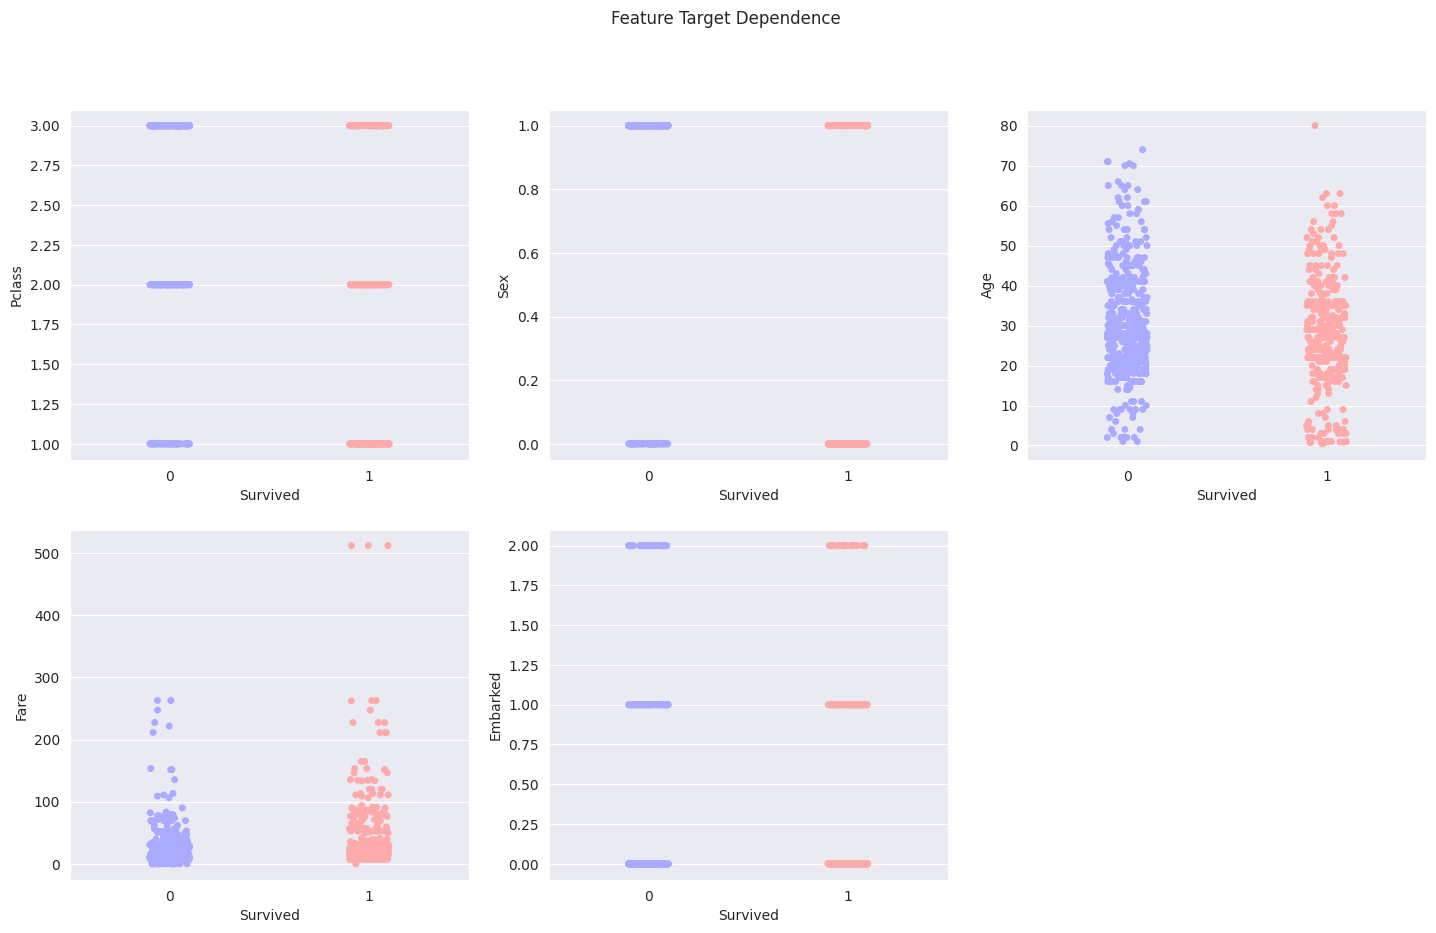

In [ ]:
figure, axes = plt.subplots(2, 3, figsize = (17.5, 10))
figure.delaxes(axes[1][2])
figure.suptitle("Feature Target Dependence")

#island
sns.stripplot(ax = axes[0, 0], data = dataset, x = "Survived", y = "Pclass", palette = "bwr")
sns.stripplot(ax = axes[0, 1], data = dataset, x = "Survived", y = "Sex", palette = "bwr")
sns.stripplot(ax = axes[0, 2], data = dataset, x = "Survived", y = "Age", palette = "bwr")
sns.stripplot(ax = axes[1, 0], data = dataset, x = "Survived", y = "Fare", palette = "bwr")
sns.stripplot(ax = axes[1, 1], data = dataset, x = "Survived", y = "Embarked", palette = "bwr")

In [ ]:
X = dataset.drop(columns = ["Survived"])
y = dataset["Survived"]

print("Features:", "\n", X[0:5])
print("Target:", "\n", y[0:5])


Features: 
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         0
1       1    0  38.0      1      0  71.2833         1
2       3    0  26.0      0      0   7.9250         0
3       1    0  35.0      1      0  53.1000         0
4       3    1  35.0      0      0   8.0500         0
Target: 
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
import numpy as np

def calculate_entropy(y):
    # Function to calculate entropy based on the target variable
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def conTocat(X, y, cost_function=calculate_entropy):
    best_split = None
    best_cost = float('inf')  # Initialize with a high value for minimization

    # Sort the unique values of X
    unique_values = np.unique(X)

    # Iterate over possible split points
    for value in unique_values:
        # Split the data into two categories based on the current value
        left_indices = X <= value
        right_indices = ~left_indices

        # Calculate the cost for the split
        cost = (
            len(y[left_indices]) * cost_function(y[left_indices]) +
            len(y[right_indices]) * cost_function(y[right_indices])
        ) / len(y)

        # Update the best split if the current split is better
        if cost < best_cost:
            best_cost = cost
            best_split = value

    # Convert continuous variable to categorical variable based on the best split
    categorical_variable = (X <= best_split).astype(int)

    return categorical_variable, best_split

categorical_variable1, best_split1 = conTocat(X['Age'], y)
categorical_variable2, best_split2 = conTocat(X['Fare'], y)
print("/n Converted categorical Age: ", categorical_variable1)
print("/n Best split point for Age: ", best_split1)
print("/n Converted categorical Fare: ", categorical_variable2)
print("/n Best split point for Fare: ", best_split2)
X['Age'] = categorical_variable1
X['Fare'] = categorical_variable2
print(X)

/n Converted categorical Age:  0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Age, Length: 889, dtype: int64
/n Best split point for Age:  6.0
/n Converted categorical Fare:  0      1
1      0
2      1
3      0
4      1
      ..
886    0
887    0
888    0
889    0
890    1
Name: Fare, Length: 889, dtype: int64
/n Best split point for Fare:  10.4625
     Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         3    1    0      1      0     1         0
1         1    0    0      1      0     0         1
2         3    0    0      0      0     1         0
3         1    0    0      1      0     0         0
4         3    1    0      0      0     1         0
..      ...  ...  ...    ...    ...   ...       ...
886       2    1    0      0      0     0         0
887       1    0    0      0      0     0         0
888       3    0    0      1      2     0         0
889       1    1    0      0      0     0         1
890       3    1   

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp set into validation and test sets (20% validation, 10% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (622, 7)
Shape of y_train: (622,)
Shape of X_test: (89, 7)
Shape of y_test: (89,)
Shape of X_val: (178, 7)
Shape of y_val: (178,)


In [ ]:
import numpy as np

class Node:
    def __init__(self, data, target, depth):
        self.data = data
        self.target = target
        self.depth = depth
        self.left = None
        self.right = None
        self.feature_index = None
        self.threshold = None
        self.value = None  # For leaf nodes

def information_gain(X, y, feature_index, threshold):
    parent_entropy = calculate_entropy(y)

    # Split the data based on the given feature and threshold
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask

    # Calculate the entropy of the child nodes
    left_entropy = calculate_entropy(y[left_mask])
    right_entropy = calculate_entropy(y[right_mask])

    # Calculate the information gain
    num_left = np.sum(left_mask)
    num_right = np.sum(right_mask)
    total_samples = len(y)

    gain = parent_entropy - (num_left / total_samples * left_entropy + num_right / total_samples * right_entropy)

    return gain

def get_best_split(X, y):
    num_features = X.shape[1]
    best_gain = 0
    best_feature_index = None
    best_threshold = None

    for feature_index in range(num_features):
        unique_values = np.unique(X[:, feature_index])

        for threshold in unique_values:
            gain = information_gain(X, y, feature_index, threshold)

            if gain > best_gain:
                best_gain = gain
                best_feature_index = feature_index
                best_threshold = threshold

    return best_feature_index, best_threshold

def make_split(node, max_depth, current_depth):
    X, y = node.data, node.target

    # Check if maximum depth is reached or if there is no information gain
    if current_depth >= max_depth or calculate_entropy(y) == 0:
        node.value = np.argmax(np.bincount(y))  # Assign the majority class to leaf node
        return

    # Get the best split
    feature_index, threshold = get_best_split(X, y)

    # Check if information gain is too low
    if feature_index is None or threshold is None:
        node.value = np.argmax(np.bincount(y))
        return

    # Split the data
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask

    node.feature_index = feature_index
    node.threshold = threshold

    # Create left and right child nodes
    node.left = Node(X[left_mask], y[left_mask], current_depth + 1)
    node.right = Node(X[right_mask], y[right_mask], current_depth + 1)

    # Recursively make splits for the child nodes
    make_split(node.left, max_depth, current_depth + 1)
    make_split(node.right, max_depth, current_depth + 1)

def train_decision_tree(X, y, max_depth):
    root = Node(X, y, depth=0)
    make_split(root, max_depth, current_depth=0)
    return root


max_depth = 4
tree = train_decision_tree(X_train.values, y_train.values, max_depth)

In [ ]:
def print_tree(node, indent=""):
    if node is None:
        return

    if node.value is not None:
        print(indent + "Leaf Node - Predicted Class:", node.value)
        return

    print(indent + f"Depth {node.depth}: Split on Feature {node.feature_index} at Threshold {node.threshold}")

    print_tree(node.left, indent + "  |--> Left: ")
    print_tree(node.right, indent + "  |--> Right: ")


print("Decision Tree:")
print_tree(tree)

Decision Tree:
Depth 0: Split on Feature 1 at Threshold 0
  |--> Left: Depth 1: Split on Feature 0 at Threshold 2
  |--> Left:   |--> Left: Depth 2: Split on Feature 4 at Threshold 0
  |--> Left:   |--> Left:   |--> Left: Depth 3: Split on Feature 0 at Threshold 1
  |--> Left:   |--> Left:   |--> Left:   |--> Left: Leaf Node - Predicted Class: 1
  |--> Left:   |--> Left:   |--> Left:   |--> Right: Leaf Node - Predicted Class: 1
  |--> Left:   |--> Left:   |--> Right: Leaf Node - Predicted Class: 1
  |--> Left:   |--> Right: Depth 2: Split on Feature 6 at Threshold 0
  |--> Left:   |--> Right:   |--> Left: Depth 3: Split on Feature 3 at Threshold 1
  |--> Left:   |--> Right:   |--> Left:   |--> Left: Leaf Node - Predicted Class: 0
  |--> Left:   |--> Right:   |--> Left:   |--> Right: Leaf Node - Predicted Class: 0
  |--> Left:   |--> Right:   |--> Right: Depth 3: Split on Feature 2 at Threshold 0
  |--> Left:   |--> Right:   |--> Right:   |--> Left: Leaf Node - Predicted Class: 1
  |-->

In [ ]:
def infer(tree, test):
    """
    Classify a single instance using the provided decision tree.

    Parameters:
    - tree: The trained decision tree
    - x: The input instance (single row of features)

    Returns:
    - Predicted class (0 or 1)
    """
    # Traverse the tree to find the leaf node
    current_node = tree

    while current_node.value is None:
        if test[current_node.feature_index] <= current_node.threshold:
            current_node = current_node.left
        else:
            current_node = current_node.right

    return current_node.value

predictions = [infer(tree, row) for row in X_test.values]
# Now 'predictions' will contain the predicted classes for each instance in X_test
print(predictions)
print(len(predictions))

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
89


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


train_predictions = [infer(tree, row) for row in X_train.values]
test_predictions = [infer(tree, row) for row in X_test.values]

# Compute accuracy
train_accuracy = accuracy_score(y_train.values, train_predictions)
test_accuracy = accuracy_score(y_test.values, test_predictions)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Confusion Matrix on the test data
conf_matrix = confusion_matrix(y_test.values, test_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report on the test data
class_report = classification_report(y_test.values, test_predictions)
print("\nClassification Report:")
print(class_report)


Training Accuracy: 0.83
Test Accuracy: 0.80

Confusion Matrix:
[[50  3]
 [15 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        53
           1       0.88      0.58      0.70        36

    accuracy                           0.80        89
   macro avg       0.82      0.76      0.77        89
weighted avg       0.81      0.80      0.79        89

